# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    """
    Build your own model
    """
    
    return model

In [12]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-3]
EPOCHS = 50
BATCH_SIZE = 256
OPTIMIZER = ["SGD", "RMSprop", "AdaGrad", "Adam"]


In [13]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for lr in LEARNING_RATE:
    for opt in OPTIMIZER:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR = %.6f" % (lr))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        
        if opt =='SGD':
            optimizer = keras.optimizers.SGD(lr=lr)
        if opt =='RMSprop':
            optimizer = keras.optimizers.RMSprop(lr=lr)
        if opt =='AdaGrad':
            optimizer = keras.optimizers.Adagrad(lr=lr)        
        if opt =='Adam':
            optimizer = keras.optimizers.Adam(lr=lr)
        
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)
    
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
    
        exp_name_tag = "exp-lr-%s-mt-%s" % (str(lr),str(opt))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)       

Epoch 50/50
50000/50000 [==============================] - 12s 245us/step - loss: 0.8033 - acc: 0.7145 - val_loss: 2.0384 - val_acc: 0.4398
Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer5 (Dense)        (None, 32

50000/50000 [==============================] - 15s 303us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 16s 315us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 14s 283us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)       

50000/50000 [==============================] - 15s 305us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 47/50
50000/50000 [==============================] - 15s 293us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 15s 292us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 15s 300us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 15s 307us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_l

50000/50000 [==============================] - 15s 306us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 45/50
50000/50000 [==============================] - 15s 303us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 46/50
50000/50000 [==============================] - 15s 306us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 47/50
50000/50000 [==============================] - 15s 303us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 15s 303us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 15s 309us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 15s 305us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR

Epoch 43/50
50000/50000 [==============================] - 12s 240us/step - loss: 1.7249 - acc: 0.3917 - val_loss: 1.7241 - val_acc: 0.3893
Epoch 44/50
50000/50000 [==============================] - 12s 235us/step - loss: 1.7196 - acc: 0.3942 - val_loss: 1.7214 - val_acc: 0.3903
Epoch 45/50
50000/50000 [==============================] - 12s 244us/step - loss: 1.7143 - acc: 0.3967 - val_loss: 1.7179 - val_acc: 0.3896
Epoch 46/50
50000/50000 [==============================] - 12s 243us/step - loss: 1.7097 - acc: 0.3975 - val_loss: 1.7091 - val_acc: 0.3895
Epoch 47/50
50000/50000 [==============================] - 12s 238us/step - loss: 1.7043 - acc: 0.4011 - val_loss: 1.7132 - val_acc: 0.3924
Epoch 48/50
50000/50000 [==============================] - 12s 240us/step - loss: 1.6997 - acc: 0.4020 - val_loss: 1.7009 - val_acc: 0.3938
Epoch 49/50
50000/50000 [==============================] - 12s 239us/step - loss: 1.6947 - acc: 0.4040 - val_loss: 1.6998 - val_acc: 0.3934
Epoch 50/50
50000/50

Epoch 42/50
50000/50000 [==============================] - 14s 280us/step - loss: 0.9097 - acc: 0.6759 - val_loss: 1.6759 - val_acc: 0.4936
Epoch 43/50
50000/50000 [==============================] - 14s 279us/step - loss: 0.8975 - acc: 0.6778 - val_loss: 1.9848 - val_acc: 0.4393
Epoch 44/50
50000/50000 [==============================] - 14s 280us/step - loss: 0.8839 - acc: 0.6810 - val_loss: 1.8684 - val_acc: 0.4578
Epoch 45/50
50000/50000 [==============================] - 14s 288us/step - loss: 0.8728 - acc: 0.6855 - val_loss: 1.6708 - val_acc: 0.4937
Epoch 46/50
50000/50000 [==============================] - 15s 307us/step - loss: 0.8546 - acc: 0.6915 - val_loss: 1.7820 - val_acc: 0.4905
Epoch 47/50
50000/50000 [==============================] - 15s 290us/step - loss: 0.8452 - acc: 0.6971 - val_loss: 1.7442 - val_acc: 0.4885
Epoch 48/50
50000/50000 [==============================] - 14s 278us/step - loss: 0.8306 - acc: 0.7014 - val_loss: 1.6860 - val_acc: 0.4963
Epoch 49/50
50000/50

Epoch 41/50
50000/50000 [==============================] - 14s 278us/step - loss: 1.3216 - acc: 0.5357 - val_loss: 1.4349 - val_acc: 0.4928
Epoch 42/50
50000/50000 [==============================] - 13s 263us/step - loss: 1.3169 - acc: 0.5371 - val_loss: 1.4225 - val_acc: 0.4913
Epoch 43/50
50000/50000 [==============================] - 13s 268us/step - loss: 1.3112 - acc: 0.5392 - val_loss: 1.4085 - val_acc: 0.4971
Epoch 44/50
50000/50000 [==============================] - 13s 267us/step - loss: 1.3058 - acc: 0.5415 - val_loss: 1.4204 - val_acc: 0.4924
Epoch 45/50
50000/50000 [==============================] - 13s 267us/step - loss: 1.3013 - acc: 0.5440 - val_loss: 1.4104 - val_acc: 0.4998
Epoch 46/50
50000/50000 [==============================] - 13s 268us/step - loss: 1.2988 - acc: 0.5425 - val_loss: 1.4389 - val_acc: 0.4894
Epoch 47/50
50000/50000 [==============================] - 13s 264us/step - loss: 1.2931 - acc: 0.5465 - val_loss: 1.4261 - val_acc: 0.4927
Epoch 48/50
50000/50

Epoch 40/50
50000/50000 [==============================] - 15s 302us/step - loss: 0.8107 - acc: 0.7112 - val_loss: 1.5789 - val_acc: 0.5233
Epoch 41/50
50000/50000 [==============================] - 15s 307us/step - loss: 0.8157 - acc: 0.7095 - val_loss: 1.5908 - val_acc: 0.5230
Epoch 42/50
50000/50000 [==============================] - 15s 305us/step - loss: 0.7929 - acc: 0.7168 - val_loss: 1.5661 - val_acc: 0.5298
Epoch 43/50
50000/50000 [==============================] - 15s 303us/step - loss: 0.7680 - acc: 0.7247 - val_loss: 1.6240 - val_acc: 0.5199
Epoch 44/50
50000/50000 [==============================] - 15s 303us/step - loss: 0.7692 - acc: 0.7256 - val_loss: 1.6249 - val_acc: 0.5233
Epoch 45/50
50000/50000 [==============================] - 15s 299us/step - loss: 0.7472 - acc: 0.7339 - val_loss: 1.6656 - val_acc: 0.5258
Epoch 46/50
50000/50000 [==============================] - 16s 330us/step - loss: 0.7287 - acc: 0.7381 - val_loss: 1.6693 - val_acc: 0.5186
Epoch 47/50
50000/50

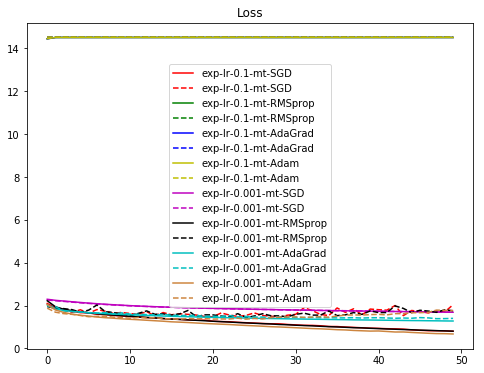

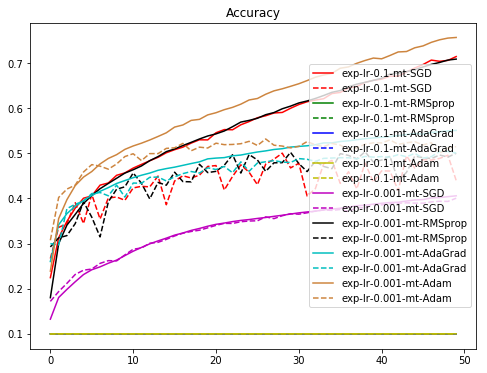

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k", "c", "peru" , "orange", "pink",""]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()